<a href="https://colab.research.google.com/github/IsadoraPfeiferSpirandelli/AnalisRegressaoLinear/blob/main/Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testando relações com Regressão Linear

### Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

##1. Conhecendo meus dados

In [2]:
#ler dados
import pandas as pd
dados = pd.read_csv("/content/Preços_de_casas.csv")

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [3]:
dados = dados.drop(columns = 'Id') #o id não vai ser útil para mim aqui

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_primeiro_andar             1438 non-null   float64
 1   existe_segundo_andar            1438 non-null   int64  
 2   area_segundo_andar              1438 non-null   float64
 3   quantidade_banheiros            1438 non-null   int64  
 4   capacidade_carros_garagem       1438 non-null   int64  
 5   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 6   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 78.8 KB


## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.

In [5]:
#correlação
corr = dados.corr()


In [6]:
corr['preco_de_venda']
#aqui vou observar ue a área do primeiro andar e a capacidade de carros na garagem são os fatores
#que mais possuem correlação com o aumento do preço de venda.

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


 analisando a correlação de todas as variáveis através de uma forma visual

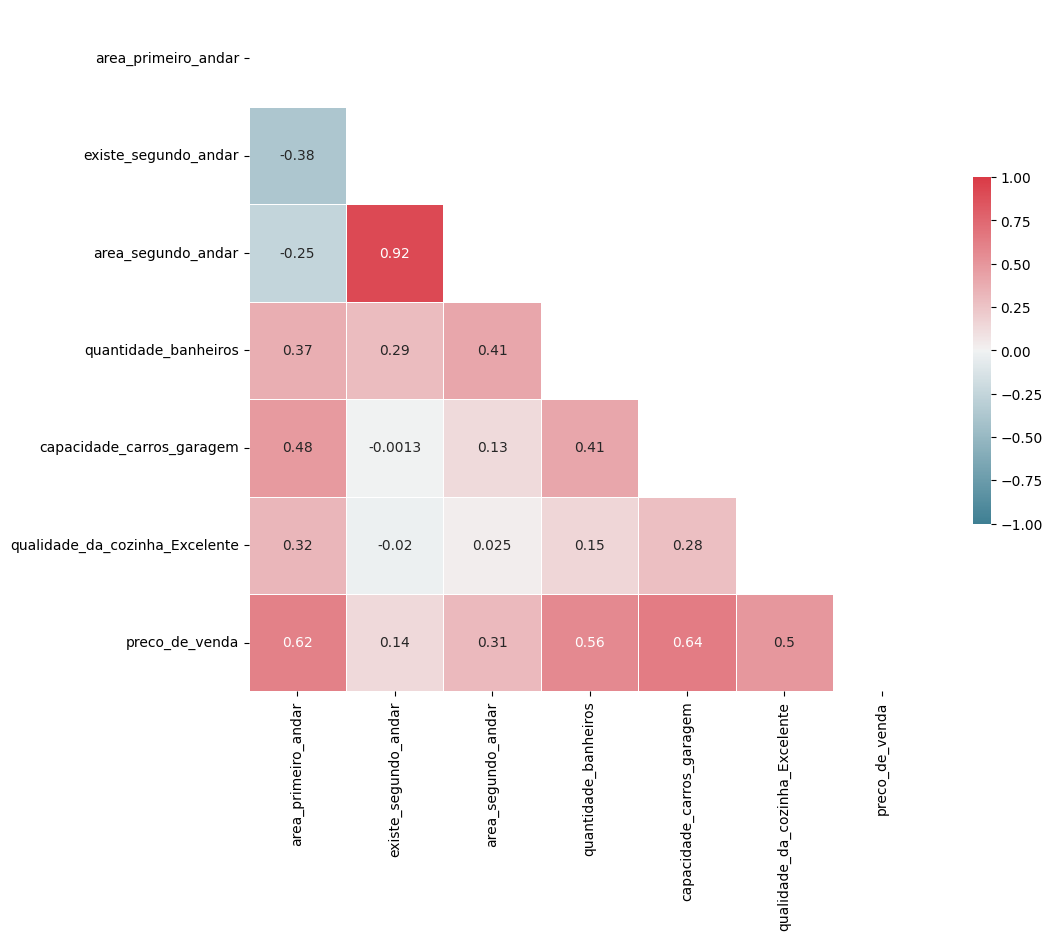

In [7]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

* A correlação entre a capacidade de carros na garagem e a área do primeiro andar é 0.48 moderadamente positiva, indicando que, em geral, à medida que a capacidade de carros na garagem aumenta, a área do primeiro andar da casa tende a aumentar também.
* Entre garagem para carros e quantidade de banheiros é moderadamente positiva (0.409281), indicando que, em geral, à medida que a capacidade da garagem aumenta, o número de banheiros também tende a aumentar. Isso sugere uma possível associação entre o espaço para estacionamento de veículos e o tamanho da residência.
* Quando olhamos para a correlação entre a área do primeiro andar e a área do segundo andar, verificamos que é fraca e negativa (-0.25). Isso sugere que, em geral, quando a área do primeiro andar de uma casa aumenta, a área do segundo andar tende a diminuir um pouco, e vice-versa. Essa relação indica uma possível compensação entre as áreas dos dois andares, mas não é uma relação muito forte e pode variar entre diferentes propriedades.

###Observação: É importante notar que a correlação não implica causalidade; ou seja, não podemos afirmar que o aumento no preço de venda é causado especificamente pelo aumento na área do primeiro andar apenas com o uso da correlação, mas sim que esses fatores estão relacionados entre si.



##Relacionando variáveis

In [8]:
import plotly.express as px

Text(0, 0.5, 'Preço de venda')

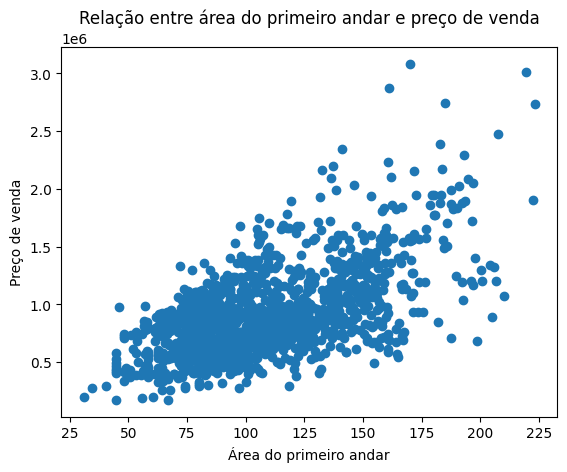

In [9]:
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre área do primeiro andar e preço de venda')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')

Text(0, 0.5, 'Preço de venda')

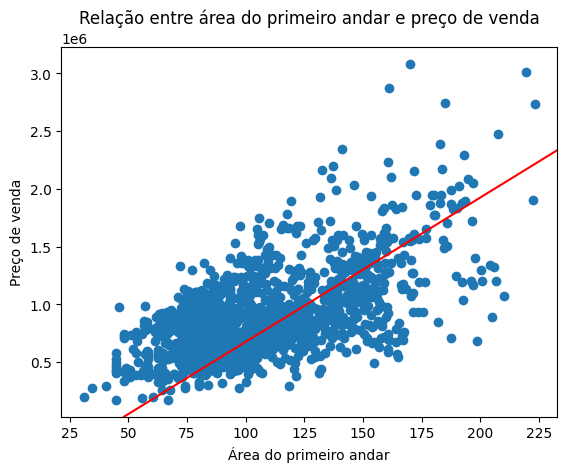

In [10]:
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000), xy2 = (190, 1800000), color = 'red')

plt.title('Relação entre área do primeiro andar e preço de venda')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')


In [11]:
#como saber qual a melhor reta usar?
#a biblioteca plotly vai me ajudar nisso

px.scatter(x = 'area_primeiro_andar', y = 'preco_de_venda', data_frame = dados, trendline_color_override= 'red', trendline = 'ols')

variável explicativa (x) = área do primeiro andar

variável resposta (y) = preço de venda

fórmula da reta: Yi = B0 + B1*Xi

##2. Explicando a reta

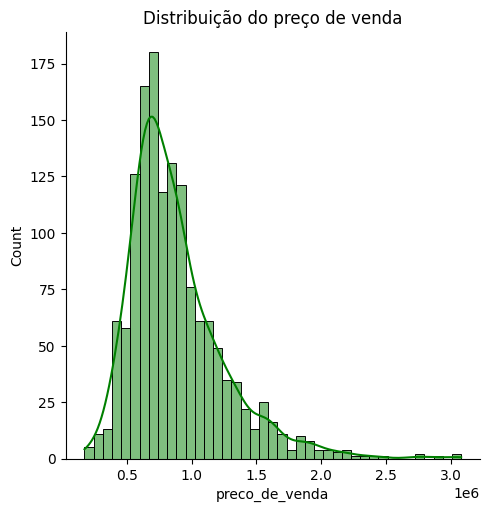

In [12]:
#Quem é nossa variável resposta? É o preço de venda, pq eu quero analisar quais os fatores que justificam este preço

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

Separar em treino e teste
- treino: serve para ajustar o modelo
- teste: serve para analisar o desempenho e prever os preços de casas não vistos durante o treinamento - auxilia na generalização do modelo

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
#definindo y e x
y = dados['preco_de_venda']
x = dados.drop(columns = 'preco_de_venda')

In [16]:
#aplicando o slpit do y e x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#random_state é minha semente de replicação

In [17]:
#dados de treino para usar na fórmula

df_train = pd.DataFrame(data = x_train)
df_train['preco_de_venda'] = y_train

In [18]:
#import ols
from statsmodels.formula.api import ols

In [19]:
#ajustando o primeiro modelo
modelo_0 = ols(formula = 'preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

analisando os coeficientes

(intensidade, direção, significancia)

In [20]:
#visualizando os parametros

modelo_0.params

,0
Intercept,145397.302896
area_primeiro_andar,6905.925181


Explicação: espera-se que, em média, quando aumentamos 1 m^2 do primeiro andar, o valor da casa aumentará em 6.905 reais.

efeito quantitativo da variavel explicativa na variavel resposta


- area 1° andar = 0 --> esperamos que a casa custe em média 145.397, 30 reais (olho para o intercepto)


In [23]:
#resumo do nosso modelo

print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     573.7
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          1.21e-100
Time:                        01:52:08   Log-Likelihood:                -14117.
No. Observations:                1006   AIC:                         2.824e+04
Df Residuals:                    1004   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.454e+05   3

Explicabilidade do modelo

In [24]:
#observando R^2 (coef de determinação)
modelo_0.rsquared

np.float64(0.3636291993675237)

interpretação: 36%  da diferença dos preços é explicada pelo tamanho do primeiro andar
64% não ta sendo explicado

R^2 mais prox de 1: melhor determinação/explicabilidade

Entendendo os resíduos

In [25]:
#quais são meus residuos
modelo_0.resid

,0
590,531581.741699
561,-108105.531128
156,686669.909313
573,481039.253654
596,-63260.170212
...,...
1095,-129005.235833
1130,63947.120080
1294,-166926.608873
860,-160627.670212


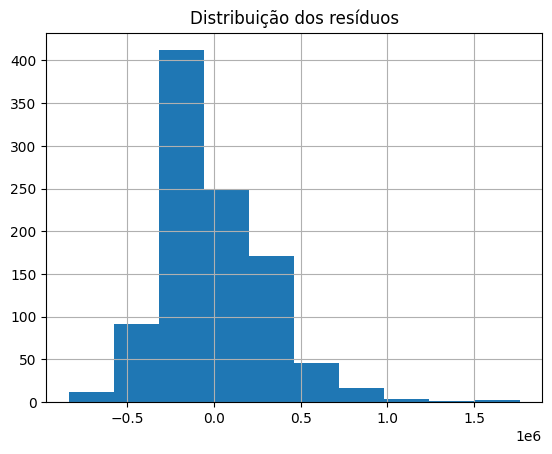

In [27]:
#como estao distribuidos
modelo_0.resid.hist()
plt.title('Distribuição dos resíduos')
plt.show()

veja que alguns residuos estao bem proximos de zero, para saber se o modelo esta bem distribuido é importante observar esse formato de sino como mostrado acimana distribuição dos residuos.

obtendo o R^2 da previsão

Quao bem meu modelo consegue prever o preço de uma casa?


In [29]:
#definindo o Y previsto
y_predict = modelo_0.predict(x_test)

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("R²: ", r2_score(y_test, y_predict))

R²:  0.42432168432534445


Estao performando bem tanto no treino quanto no teste

Quais outros fatores piodem ser inseridos nesse modelo?

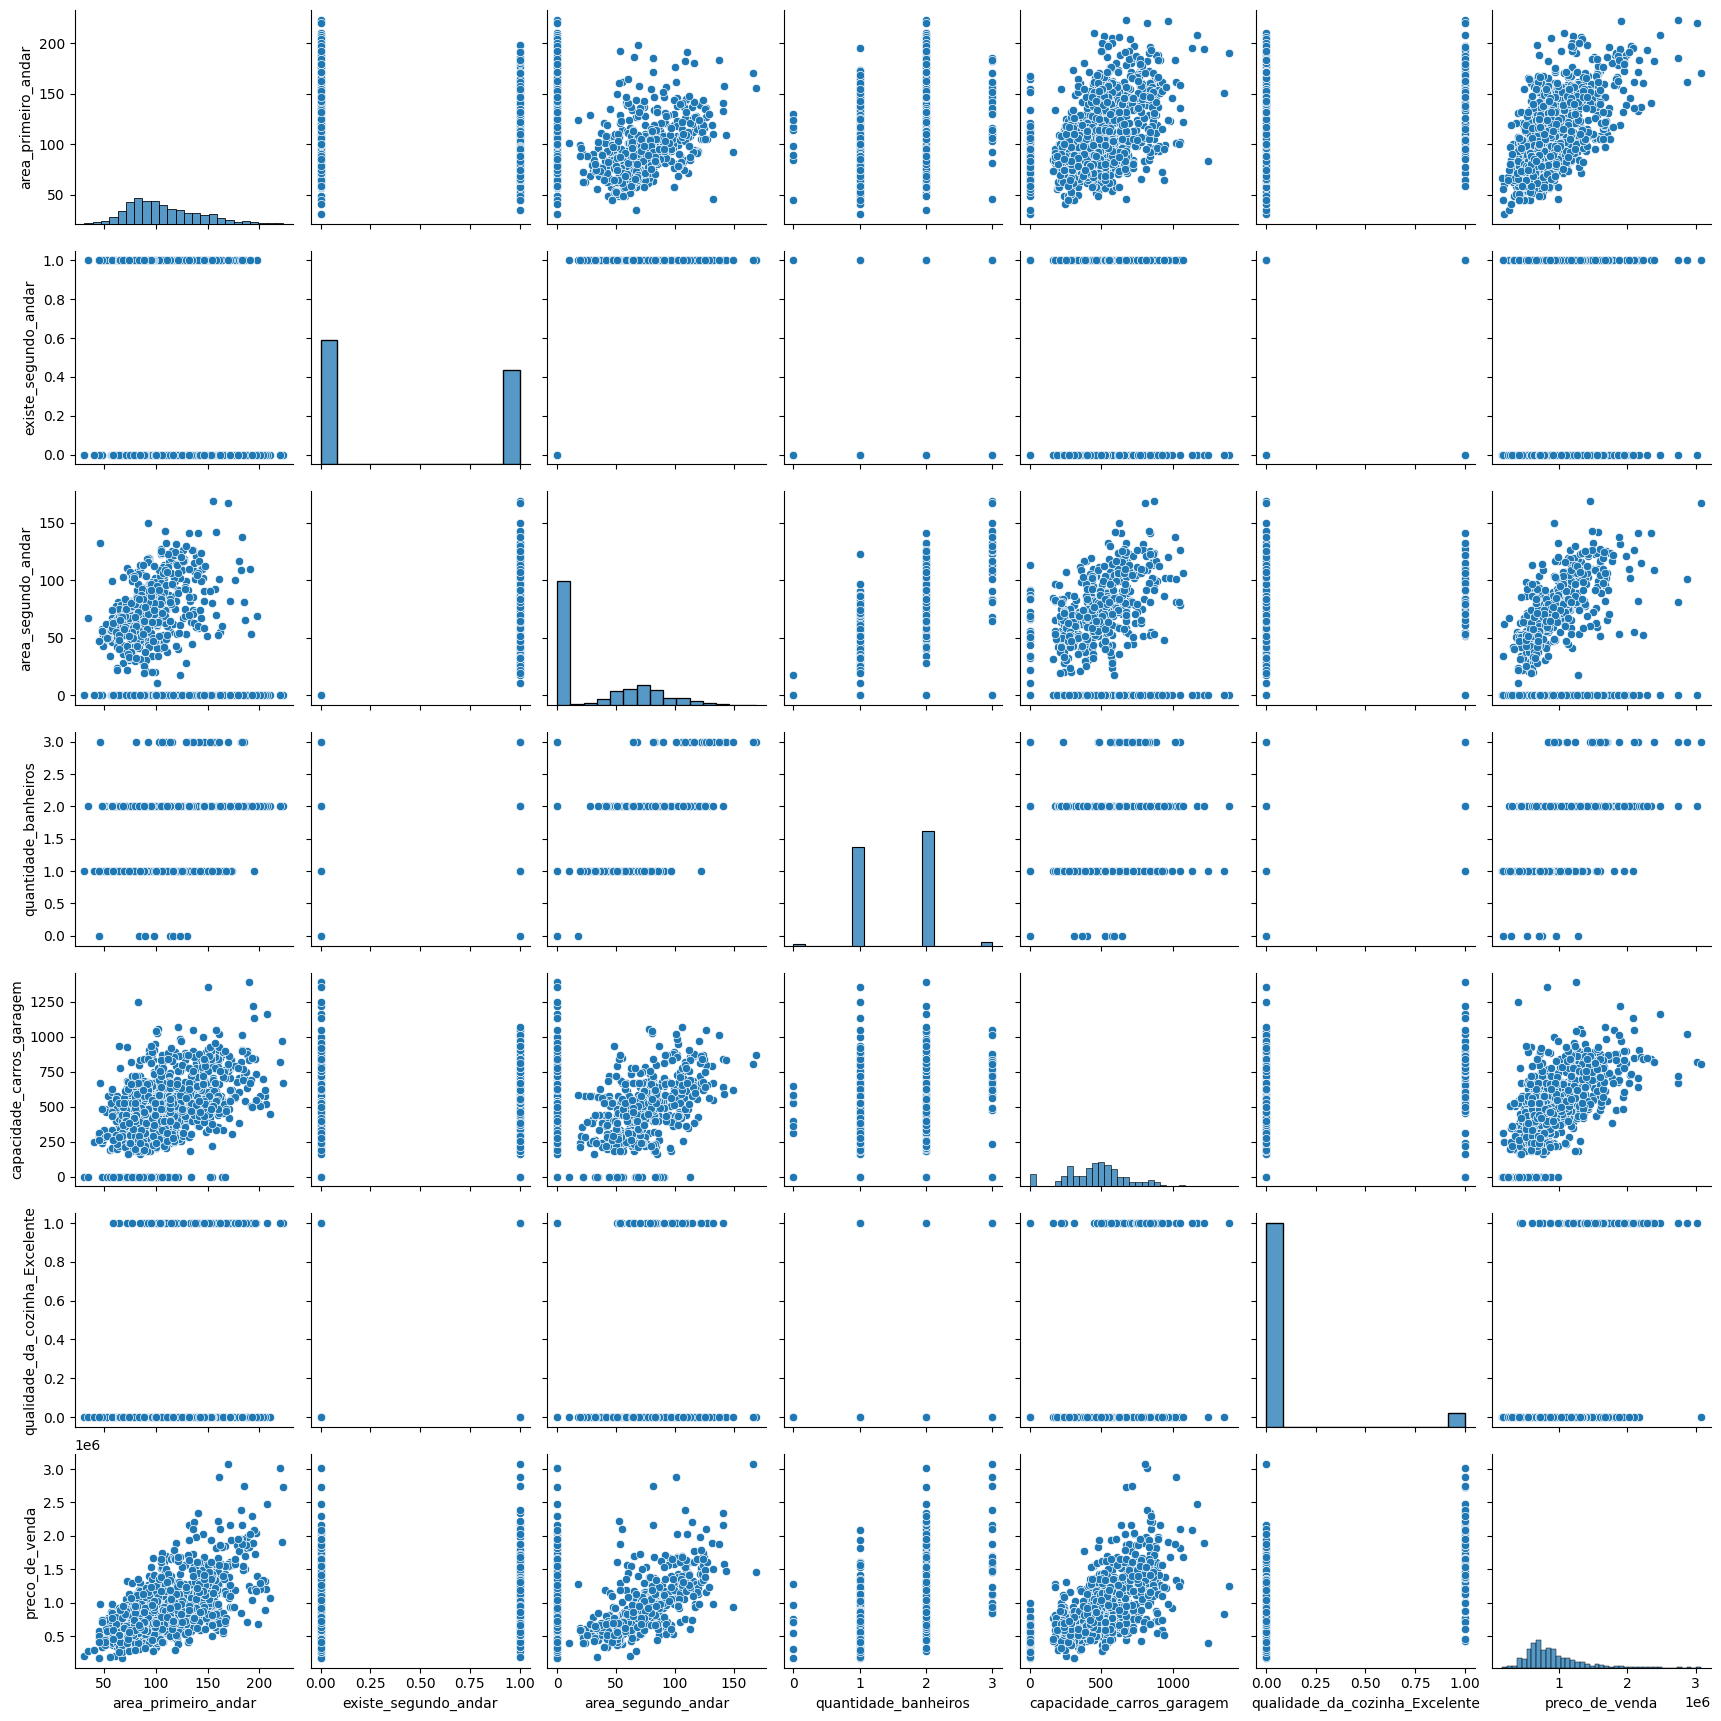

In [32]:
sns.pairplot(dados) #ela vai cruzar todos os fatores entre si e criando grafico para cada par de variaveis

In [33]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

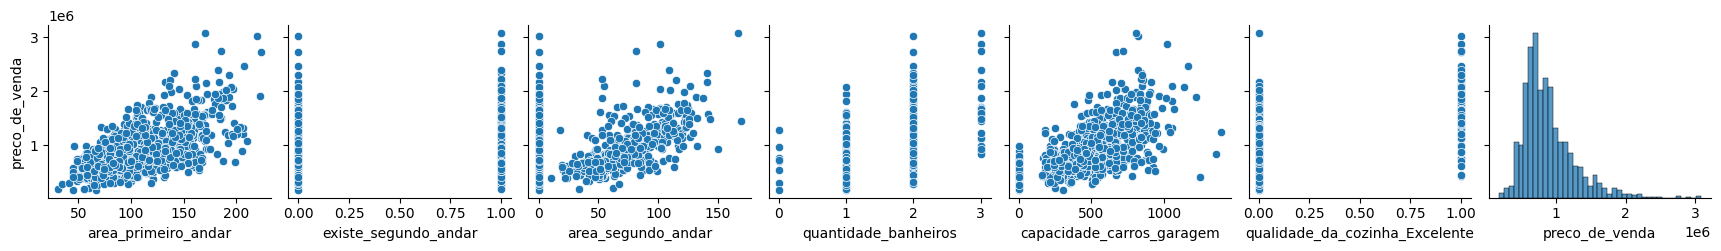

In [34]:
#olhando apenas com y_vars = 'preco_de_veda'
sns.pairplot(dados, y_vars = 'preco_de_venda')

adicionando variaveis no modelo

In [35]:
import statsmodels.api as sm

In [37]:
#adicionando uma cote para estimar o intercepto
x_train = sm.add_constant(x_train)

In [38]:
x_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
590,1.0,98.2882,1,78.5934,2,736,1
561,1.0,80.2656,0,0.0000,1,288,0
156,1.0,71.9046,1,110.9226,2,680,1
573,1.0,141.3009,1,116.4966,3,880,0
596,1.0,96.6160,0,0.0000,1,576,0


In [39]:
#criando modelo saturado - modelo com a maioria das variaveis expliactivas que acredito que sejam boas
modelo_1 = sm.OLS(y_train , x_train).fit()

In [40]:
#modelo sem area do segundo andar
modelo_2 = sm.OLS(y_train, x_train.drop(columns = 'area_segundo_andar')).fit()

In [52]:
#modelo sem informação da garagem
modelo_3 = sm.OLS(y_train, x_train.drop(columns = 'capacidade_carros_garagem', 'area_segundo_andar')).fit()

In [44]:
#resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     538.8
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          5.16e-309
Time:                        02:25:01   Log-Likelihood:                -13619.
No. Observations:                1006   AIC:                         2.725e+04
Df Residuals:                     999   BIC:                         2.729e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [45]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     554.0
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          3.59e-285
Time:                        02:25:29   Log-Likelihood:                -13677.
No. Observations:                1006   AIC:                         2.737e+04
Df Residuals:                    1000   BIC:                         2.740e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [53]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     493.7
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          5.18e-235
Time:                        02:48:15   Log-Likelihood:                -13797.
No. Observations:                1006   AIC:                         2.760e+04
Df Residuals:                    1001   BIC:                         2.763e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

comparando os modelos

In [54]:
print("R²")
print("R² Modelo 0:", modelo_0.rsquared)
print("R² Modelo 1: ", modelo_1.rsquared)
print("R² Modelo 2: ", modelo_2.rsquared)
print("R² Modelo 3: ", modelo_3.rsquared)

R²
R² Modelo 0: 0.3636291993675237
R² Modelo 1:  0.7639149214486479
R² Modelo 2:  0.7347484696298161
R² Modelo 3:  0.6636001317959366


In [55]:
#quanto parametros estao no modelo
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


In [56]:
modelo_3.params

,0
const,-139909.383257
area_primeiro_andar,5897.166849
existe_segundo_andar,216194.654924
quantidade_banheiros,172321.426027
qualidade_da_cozinha_Excelente,477782.406477


- efeito isolado
- efeito atrelado

Precificando as casas

- obtendo o R²

In [60]:
x_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [58]:
 modelo_3.params

,0
const,-139909.383257
area_primeiro_andar,5897.166849
existe_segundo_andar,216194.654924
quantidade_banheiros,172321.426027
qualidade_da_cozinha_Excelente,477782.406477


In [59]:
#adicionando uma cte em x_test
x_test = sm.add_constant(x_test)

In [61]:
#prevendo preços com modelo 3
predict_3 = modelo_3.predict(x_test[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']])

In [62]:
#qual o R² da previsao
modelo_3.rsquared

np.float64(0.6636001317959366)

In [63]:
#qual o R² do treino
print("R²: ", r2_score(y_test, predict_3))

R²:  0.6058436853884375


Analisando uma nova casa

In [64]:
modelo_3.params

,0
const,-139909.383257
area_primeiro_andar,5897.166849
existe_segundo_andar,216194.654924
quantidade_banheiros,172321.426027
qualidade_da_cozinha_Excelente,477782.406477


In [66]:
#novo imovel
novo_imovel = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [120],
    'existe_segundo_andar': [1],
    'quantidade_banheiros': [2],
    'qualidade_da_cozinha_Excelente': [0]
})


In [68]:
#qual seria o preço desse imovel nno modelo 0
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,974108.324652


In [69]:
#preço com o modelo 3
modelo_3.predict(novo_imovel)

,0
0,1.128588e+06


Precificando varias casas

In [87]:
novas_casas = pd.read_csv("/content/Novas_casas.csv")

In [88]:
novas_casas.head()

,ï»¿Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [ ]:
#tirar coluna casa
novas_casas = novas_casas.drop(columns = 'ï»¿Casa')

In [94]:
#adicionar constante
novas_casas = sm.add_constant(novas_casas)

In [95]:
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [96]:
#qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.783286e+06
1,1.916327e+06
2,1.606371e+06
3,2.250465e+06
4,1.626063e+06
5,1.246531e+06
6,1.379573e+06
7,1.541390e+06
8,9.713652e+05
9,1.654740e+06


Investigando o modelo de MULTICOLINEARIDADE

In [97]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [99]:
#VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1
vif_1['vif'] = [variance_inflation_factor(x_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [100]:
vif_1

,variavel,vif
0,const,20.849900
1,area_primeiro_andar,2.090987
2,existe_segundo_andar,7.861873
3,area_segundo_andar,8.069881
4,quantidade_banheiros,1.777582
5,capacidade_carros_garagem,1.513916
6,qualidade_da_cozinha_Excelente,1.167115


quanto menor o vif, menos presença de colinearidade tem.

vif>5 existe multicolinearidade

In [101]:
#VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3
vif_3['vif'] = [variance_inflation_factor(x_train[explicativas_3], i) for i in range(len(explicativas_3))]

In [102]:
vif_3

,variavel,vif
0,const,18.608749
1,area_primeiro_andar,1.882045
2,existe_segundo_andar,1.601518
3,quantidade_banheiros,1.566404
4,qualidade_da_cozinha_Excelente,1.146313


vif baixo, existe evidencias suficientes para dizer que não há multicolinearidade.

Análise dos resíduos

In [105]:
#prevendo os valores do treino x_train[explicativa_3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3])


In [106]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x= y_previsto_train    , y= y_train      ,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

- Regiões de menor preço (inferior esquerdo): Os pontos estão mais agrupados e próximos à linha ideal. Isso sugere que o modelo tem um desempenho melhor e mais consistente para preços de casas mais baixos.

- Regiões de maior preço (superior direito): Há uma maior dispersão dos pontos. Isso indica que, para casas com preços reais mais altos, o modelo tem uma maior variabilidade em suas previsões, ou seja, os erros são maiores. Ele pode estar subestimando ou superestimando mais significativamente os preços mais caros.


Considerações finais a partir deste gráfico de disperção:
- Bom Desempenho Geral: O modelo tem uma capacidade razoável de prever os preços, pois há uma correlação positiva clara entre os preços previstos e reais. A nuvem de pontos se alinha bem com a diagonal.

- Melhor Desempenho em Preços Baixos/Médios: A precisão do modelo é maior para casas de menor valor.

- Desempenho Reduzido em Preços Altos: O modelo luta mais para prever com precisão os preços das casas mais caras, mostrando maior erro/variabilidade nessa faixa.

In [108]:
#resíduos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

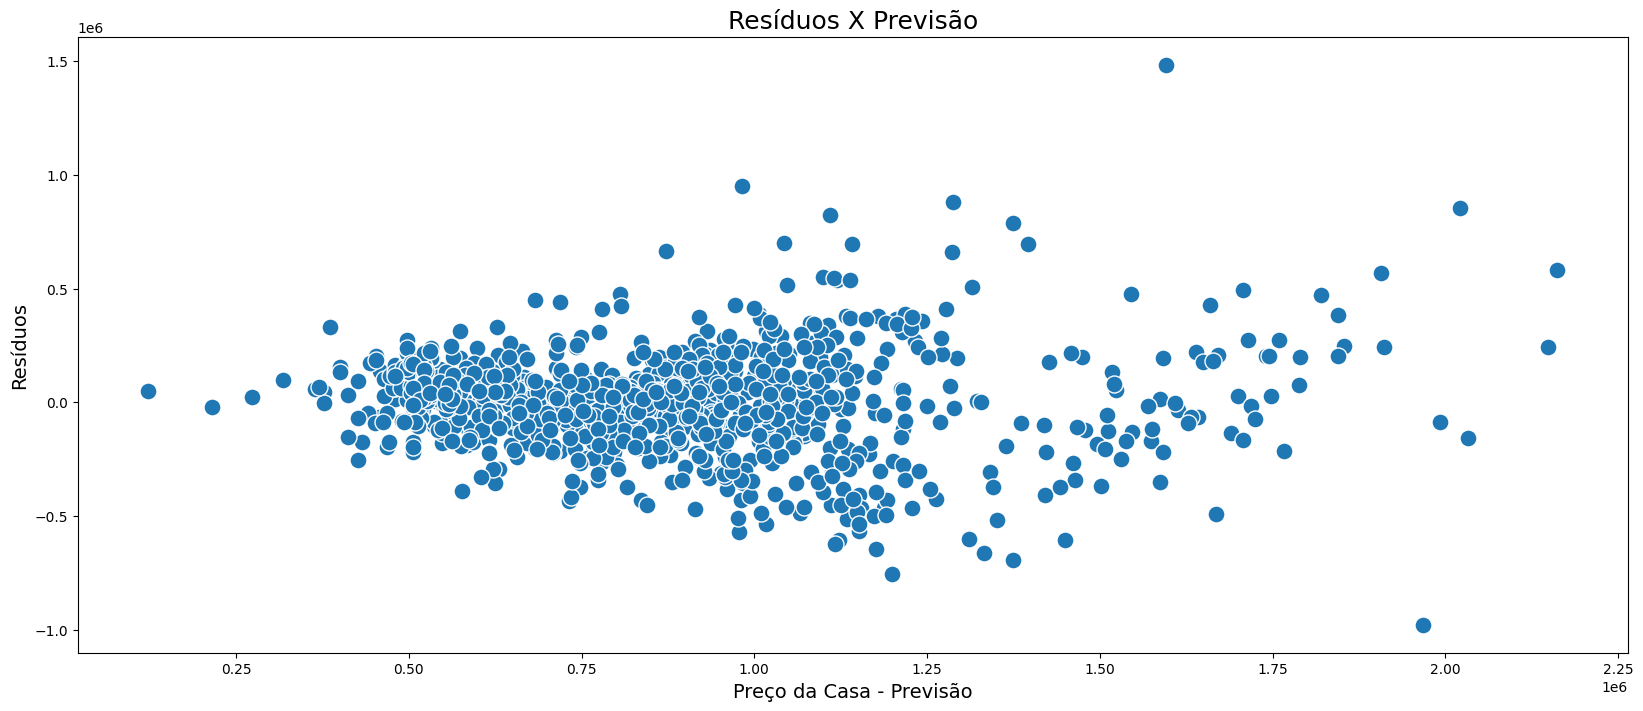

In [109]:
ax = sns.scatterplot(x= y_previsto_train      , y= residuos       , s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Os residuos estão na maioria em torno de zero, o que é bom. Mas a medida que o preço da casa aumenta, vemos que a distancia do zero fica maior.

espera-se que não exista um padrão aqui, que os residuos sejam totalmente aleatorios